## Pandas: Data Manipulation & Handling Missing Data

In this lesson, we'll cover foundational techniques in Pandas for data manipulation, incluing creating and modifying DataFrames, handling missing data, and grouping data for aggregation. We'll also dive deeper into strategies for handling missing data.

_____

In [1]:
import numpy as np
import pandas as pd

import random

**Let's create a DataFrame of random data**

In [2]:
data_dict = {f'column {i}': [random.randint(0, 100) for _ in range(10)] for i in range(10)}

data_dict

{'column 0': [85, 38, 19, 18, 88, 44, 100, 89, 70, 70],
 'column 1': [13, 35, 55, 71, 31, 30, 79, 77, 7, 54],
 'column 2': [48, 98, 27, 35, 85, 0, 100, 59, 81, 47],
 'column 3': [2, 6, 79, 51, 97, 38, 96, 70, 23, 0],
 'column 4': [71, 26, 96, 24, 27, 28, 8, 49, 57, 39],
 'column 5': [37, 3, 54, 92, 22, 34, 10, 95, 99, 52],
 'column 6': [19, 90, 74, 63, 74, 32, 81, 65, 10, 46],
 'column 7': [76, 23, 92, 97, 77, 88, 98, 92, 6, 49],
 'column 8': [88, 97, 81, 4, 100, 55, 57, 34, 36, 47],
 'column 9': [52, 20, 81, 60, 76, 6, 58, 76, 63, 36]}

In [3]:
data_df = pd.DataFrame(data_dict)

data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,85,13,48,2,71,37,19,76,88,52
1,38,35,98,6,26,3,90,23,97,20
2,19,55,27,79,96,54,74,92,81,81
3,18,71,35,51,24,92,63,97,4,60
4,88,31,85,97,27,22,74,77,100,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,98,57,58
7,89,77,59,70,49,95,65,92,34,76
8,70,7,81,23,57,99,10,6,36,63
9,70,54,47,0,39,52,46,49,47,36


## Modify data in a dataframe

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   column 0  10 non-null     int64
 1   column 1  10 non-null     int64
 2   column 2  10 non-null     int64
 3   column 3  10 non-null     int64
 4   column 4  10 non-null     int64
 5   column 5  10 non-null     int64
 6   column 6  10 non-null     int64
 7   column 7  10 non-null     int64
 8   column 8  10 non-null     int64
 9   column 9  10 non-null     int64
dtypes: int64(10)
memory usage: 932.0 bytes


In [5]:
data_df.iloc[3,5] = 14

data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,85,13,48,2,71,37,19,76,88,52
1,38,35,98,6,26,3,90,23,97,20
2,19,55,27,79,96,54,74,92,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,77,100,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,98,57,58
7,89,77,59,70,49,95,65,92,34,76
8,70,7,81,23,57,99,10,6,36,63
9,70,54,47,0,39,52,46,49,47,36


In [6]:
data_df.loc[2, 'column 7'] = -100

data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,85,13,48,2,71,37,19,76,88,52
1,38,35,98,6,26,3,90,23,97,20
2,19,55,27,79,96,54,74,-100,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,77,100,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,98,57,58
7,89,77,59,70,49,95,65,92,34,76
8,70,7,81,23,57,99,10,6,36,63
9,70,54,47,0,39,52,46,49,47,36


In [7]:
# changing multiple values at once

data_df.iloc[:3, :3] = 0

data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19,76,88,52
1,0,0,0,6,26,3,90,23,97,20
2,0,0,0,79,96,54,74,-100,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,77,100,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,98,57,58
7,89,77,59,70,49,95,65,92,34,76
8,70,7,81,23,57,99,10,6,36,63
9,70,54,47,0,39,52,46,49,47,36


**Using iloc and loc to modify values based on conditions**

In [8]:
data_df['column 0'].values

array([  0,   0,   0,  18,  88,  44, 100,  89,  70,  70])

In [9]:
data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19,76,88,52
1,0,0,0,6,26,3,90,23,97,20
2,0,0,0,79,96,54,74,-100,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,77,100,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,98,57,58
7,89,77,59,70,49,95,65,92,34,76
8,70,7,81,23,57,99,10,6,36,63
9,70,54,47,0,39,52,46,49,47,36


In [10]:
data_df.iloc[(data_df['column 0'] > 50).values, [7, 8]] = 9999

In [11]:
data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19,76,88,52
1,0,0,0,6,26,3,90,23,97,20
2,0,0,0,79,96,54,74,-100,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,9999,9999,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,9999,9999,58
7,89,77,59,70,49,95,65,9999,9999,76
8,70,7,81,23,57,99,10,9999,9999,63
9,70,54,47,0,39,52,46,9999,9999,36


In [12]:
data_df.loc[data_df['column 1'] > 80, ['column 4', 'column 6']] = 1234567890

data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19,76,88,52
1,0,0,0,6,26,3,90,23,97,20
2,0,0,0,79,96,54,74,-100,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,9999,9999,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,9999,9999,58
7,89,77,59,70,49,95,65,9999,9999,76
8,70,7,81,23,57,99,10,9999,9999,63
9,70,54,47,0,39,52,46,9999,9999,36


_____

## Handling missing data in Pandas

In [13]:
data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19,76,88,52
1,0,0,0,6,26,3,90,23,97,20
2,0,0,0,79,96,54,74,-100,81,81
3,18,71,35,51,24,14,63,97,4,60
4,88,31,85,97,27,22,74,9999,9999,76
5,44,30,0,38,28,34,32,88,55,6
6,100,79,100,96,8,10,81,9999,9999,58
7,89,77,59,70,49,95,65,9999,9999,76
8,70,7,81,23,57,99,10,9999,9999,63
9,70,54,47,0,39,52,46,9999,9999,36


Let's introduce some missing data

In [14]:
data_df.loc[2, 'column 6'] = None
data_df.loc[4, 'column 7'] = None

data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19.0,76.0,88,52
1,0,0,0,6,26,3,90.0,23.0,97,20
2,0,0,0,79,96,54,NaN,-100.0,81,81
3,18,71,35,51,24,14,63.0,97.0,4,60
4,88,31,85,97,27,22,74.0,NaN,9999,76
5,44,30,0,38,28,34,32.0,88.0,55,6
6,100,79,100,96,8,10,81.0,9999.0,9999,58
7,89,77,59,70,49,95,65.0,9999.0,9999,76
8,70,7,81,23,57,99,10.0,9999.0,9999,63
9,70,54,47,0,39,52,46.0,9999.0,9999,36


In [15]:
data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19.0,76.0,88,52
1,0,0,0,6,26,3,90.0,23.0,97,20
2,0,0,0,79,96,54,NaN,-100.0,81,81
3,18,71,35,51,24,14,63.0,97.0,4,60
4,88,31,85,97,27,22,74.0,NaN,9999,76
5,44,30,0,38,28,34,32.0,88.0,55,6
6,100,79,100,96,8,10,81.0,9999.0,9999,58
7,89,77,59,70,49,95,65.0,9999.0,9999,76
8,70,7,81,23,57,99,10.0,9999.0,9999,63
9,70,54,47,0,39,52,46.0,9999.0,9999,36


In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column 0  10 non-null     int64  
 1   column 1  10 non-null     int64  
 2   column 2  10 non-null     int64  
 3   column 3  10 non-null     int64  
 4   column 4  10 non-null     int64  
 5   column 5  10 non-null     int64  
 6   column 6  9 non-null      float64
 7   column 7  9 non-null      float64
 8   column 8  10 non-null     int64  
 9   column 9  10 non-null     int64  
dtypes: float64(2), int64(8)
memory usage: 932.0 bytes


In [17]:
data_df.isnull()

#data_df.isna()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [18]:
data_df.isnull().sum() # beräknar kolumnvis alla True (dvs alla missing values)

column 0    0
column 1    0
column 2    0
column 3    0
column 4    0
column 5    0
column 6    1
column 7    1
column 8    0
column 9    0
dtype: int64

In [19]:
data_df.isnull().sum().sum() # beräknar totalt antal missing values

np.int64(2)

In [20]:
data_df.notnull()

# är helt ekvivalent med 
# ~data_df.isnull()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,False,True,True
5,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True


______

## Strategies for handling missing data

In some cases, especially when the amount of missing data is minimal or "irrelevant", it's common to drop either the rows or (less likely) the columns containing them.

In [21]:
# by default, drops the rows containing ANY missing values

data_df.dropna() # requires in_place=True if I want a persistent change

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19.0,76.0,88,52
1,0,0,0,6,26,3,90.0,23.0,97,20
3,18,71,35,51,24,14,63.0,97.0,4,60
5,44,30,0,38,28,34,32.0,88.0,55,6
6,100,79,100,96,8,10,81.0,9999.0,9999,58
7,89,77,59,70,49,95,65.0,9999.0,9999,76
8,70,7,81,23,57,99,10.0,9999.0,9999,63
9,70,54,47,0,39,52,46.0,9999.0,9999,36


In [22]:
data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19.0,76.0,88,52
1,0,0,0,6,26,3,90.0,23.0,97,20
2,0,0,0,79,96,54,NaN,-100.0,81,81
3,18,71,35,51,24,14,63.0,97.0,4,60
4,88,31,85,97,27,22,74.0,NaN,9999,76
5,44,30,0,38,28,34,32.0,88.0,55,6
6,100,79,100,96,8,10,81.0,9999.0,9999,58
7,89,77,59,70,49,95,65.0,9999.0,9999,76
8,70,7,81,23,57,99,10.0,9999.0,9999,63
9,70,54,47,0,39,52,46.0,9999.0,9999,36


In [23]:
# drop columns with missing values

data_df.dropna(axis=1)

,column 0,column 1,column 2,column 3,column 4,column 5,column 8,column 9
0,0,0,0,2,71,37,88,52
1,0,0,0,6,26,3,97,20
2,0,0,0,79,96,54,81,81
3,18,71,35,51,24,14,4,60
4,88,31,85,97,27,22,9999,76
5,44,30,0,38,28,34,55,6
6,100,79,100,96,8,10,9999,58
7,89,77,59,70,49,95,9999,76
8,70,7,81,23,57,99,9999,63
9,70,54,47,0,39,52,9999,36


## Strategy 2: Filling missing data (imputation)

In other cases, it's more appropriate to fill the missing data with a value. This can be done with the `fillna()` method.

**Filling in with a constant value**

In [24]:
data_df

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19.0,76.0,88,52
1,0,0,0,6,26,3,90.0,23.0,97,20
2,0,0,0,79,96,54,NaN,-100.0,81,81
3,18,71,35,51,24,14,63.0,97.0,4,60
4,88,31,85,97,27,22,74.0,NaN,9999,76
5,44,30,0,38,28,34,32.0,88.0,55,6
6,100,79,100,96,8,10,81.0,9999.0,9999,58
7,89,77,59,70,49,95,65.0,9999.0,9999,76
8,70,7,81,23,57,99,10.0,9999.0,9999,63
9,70,54,47,0,39,52,46.0,9999.0,9999,36


In [25]:
data_df.fillna(666)

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0,2,71,37,19.0,76.0,88,52
1,0,0,0,6,26,3,90.0,23.0,97,20
2,0,0,0,79,96,54,666.0,-100.0,81,81
3,18,71,35,51,24,14,63.0,97.0,4,60
4,88,31,85,97,27,22,74.0,666.0,9999,76
5,44,30,0,38,28,34,32.0,88.0,55,6
6,100,79,100,96,8,10,81.0,9999.0,9999,58
7,89,77,59,70,49,95,65.0,9999.0,9999,76
8,70,7,81,23,57,99,10.0,9999.0,9999,63
9,70,54,47,0,39,52,46.0,9999.0,9999,36


**Filling in with statistical values (mean, meadian, mode)**

**mean**

In [26]:
data_df['column 7'].fillna(data_df['column 7'].mean()) # requires inplace=True for persistent change

0      76.000000
1      23.000000
2    -100.000000
3      97.000000
4    4464.444444
5      88.000000
6    9999.000000
7    9999.000000
8    9999.000000
9    9999.000000
Name: column 7, dtype: float64

**median**

In [27]:
data_df['column 7'].fillna(data_df['column 7'].median())

0      76.0
1      23.0
2    -100.0
3      97.0
4      97.0
5      88.0
6    9999.0
7    9999.0
8    9999.0
9    9999.0
Name: column 7, dtype: float64

**mode**

In [28]:
data_df['column 7'].fillna(data_df['column 7'].mode()[0])

0      76.0
1      23.0
2    -100.0
3      97.0
4    9999.0
5      88.0
6    9999.0
7    9999.0
8    9999.0
9    9999.0
Name: column 7, dtype: float64

_____

## Grouping data with groupby

Grouping data allows us to perform aggregations on subsets of data. For example, we might want to calculate the average value of a column for each unique value in another column.

In [29]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')

titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
child_mask = titanic_df['who'] != 'man'
male_mask = titanic_df['sex'] == 'male'

titanic_df[child_mask & male_mask]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
50,0,3,male,7.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.00,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
63,0,3,male,4.00,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
125,1,3,male,12.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
165,1,3,male,9.00,0,2,20.5250,S,Third,child,False,NaN,Southampton,yes,False
171,0,3,male,4.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [32]:
titanic_df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [33]:
# total average age

titanic_df['age'].mean()

np.float64(29.69911764705882)

<Axes: xlabel='age', ylabel='Count'>

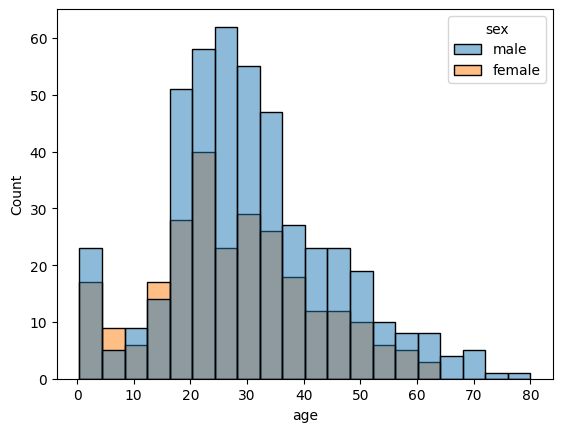

In [34]:
sns.histplot(x='age', data=titanic_df, hue='sex')

In [35]:
titanic_df.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [36]:
titanic_df.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [37]:
titanic_df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [38]:
titanic_df.groupby('class')['survived'].sum()

C:\Users\Leyla\AppData\Local\Temp\ipykernel_3780\3919713658.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('class')['survived'].sum()


class
First     136
Second     87
Third     119
Name: survived, dtype: int64

**Grouping by and aggregating by multiple columns**

In [39]:
titanic_df.groupby(['sex', 'survived'])['age'].mean()

sex     survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: age, dtype: float64

In [40]:
titanic_df.groupby(['sex', 'survived'])[['age', 'fare']].mean()

age       fare
sex    survived                      
female 0         25.046875  23.024385
       1         28.847716  51.938573
male   0         31.618056  21.960993
       1         27.276022  40.821484

In [43]:
titanic_df.groupby(['sex', 'class', 'survived'])[['age', 'fare']].mean()

C:\Users\Leyla\AppData\Local\Temp\ipykernel_3780\4115897755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby(['sex', 'class', 'survived'])[['age', 'fare']].mean()


age        fare
sex    class  survived                       
female First  0         25.666667  110.604167
              1         34.939024  105.978159
       Second 0         36.000000   18.250000
              1         28.080882   22.288989
       Third  0         23.818182   19.773093
              1         19.329787   12.464526
male   First  0         44.581967   62.894910
              1         36.248000   74.637320
       Second 0         33.369048   19.488965
              1         16.022000   21.095100
       Third  0         27.255814   12.204469
              1         22.274211   15.579696